In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
dfPop = pd.read_csv("dados/Pop-2010-AM-Censo-Ajustado.csv", sep=";")
dfObitosSIM = pd.read_csv("dados/Obitos-2010-AM-SIM-Ajustado.csv", sep=";")
dfObitosCenso = pd.read_csv("dados/Obitos-2010-AM-Censo-Ajustado.csv", sep=";")
dfObitosRegistroCivil = pd.read_csv("dados/Obitos-2010-AM-Registro-Civil-Ajustado.csv", sep=";")

print("Amazonas - 2010\n")
print("Censo Demográfico 2010")
print("População Total: %s" % (dfPop["Homens"].sum() + dfPop["Mulheres"].sum()))
print("Homens: %s" % dfPop["Homens"].sum())
print("Mulheres: %s" % dfPop["Mulheres"].sum())

def my_data_desc(dfAux, source):
    print("\nÓbitos - ", source)
    print("Total: %s" % int(round(dfAux["Homens"].sum() + dfAux["Mulheres"].sum())))
    print(" - Homens: %s" % int(round(dfAux["Homens"].sum())))
    print(" - Mulheres: %s" % int(round(dfAux["Mulheres"].sum())))

my_data_desc(dfObitosCenso, "Censo")
my_data_desc(dfObitosSIM, "SIM")
my_data_desc(dfObitosRegistroCivil, "Registro Civil")


Amazonas - 2010

Censo Demográfico 2010
População Total: 3483987
Homens: 1753178
Mulheres: 1730809

Óbitos -  Censo
Total: 14270
 - Homens: 8340
 - Mulheres: 5930

Óbitos -  SIM
Total: 13297
 - Homens: 8065
 - Mulheres: 5232

Óbitos -  Registro Civil
Total: 12223
 - Homens: 7420
 - Mulheres: 4803


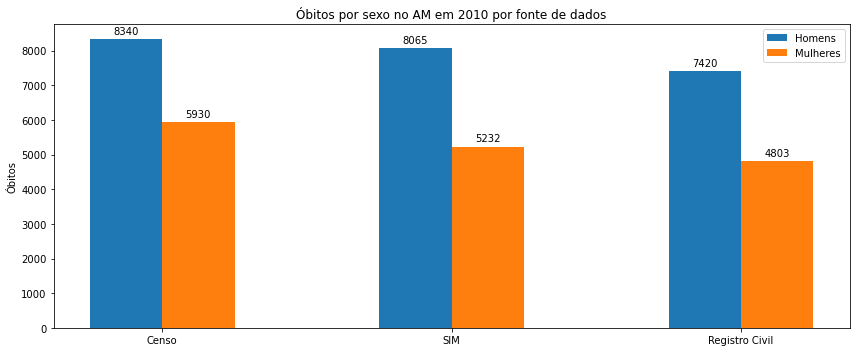

In [3]:
labels = ['Censo', 'SIM', 'Registro Civil']
men_means = [8340, 8065, 7420]
women_means = [5930, 5232, 4803]

x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots(figsize=(12,5))
rects1 = ax.bar(x - width/2, men_means, width, label='Homens')
rects2 = ax.bar(x + width/2, women_means, width, label='Mulheres')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Óbitos')
ax.set_title('Óbitos por sexo no AM em 2010 por fonte de dados')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

## Taxas Específicas de Mortalidade - TEM

In [4]:
dfObitosCenso.head()

,Idade,Homens,Mulheres
0,Menos de 1 ano,654.2,553.1
1,1 a 4 anos,256.1,188.0
2,5 a 9 anos,108.0,80.0
3,10 a 14 anos,105.0,81.0
4,15 a 19 anos,350.1,147.0


In [5]:
def calcula_TEF(dfAux):
    dfAux["TEM_m"] = dfAux["Homens"] / dfPop["Homens"]
    dfAux["TEM_m"] = (dfAux["TEM_m"])
    
    dfAux["TEM_f"] = dfAux["Mulheres"] / dfPop["Mulheres"]
    dfAux["TEM_f"] = (dfAux["TEM_f"])

calcula_TEF(dfObitosCenso)
dfObitosCenso.to_csv("dados/Obitos-2010-AM-Censo-Ajustado-TEM.csv", sep=";",index=False)

calcula_TEF(dfObitosRegistroCivil)
dfObitosRegistroCivil.to_csv("dados/Obitos-2010-AM-Registro-Civil-Ajustado-TEM.csv", sep=";",index=False)

calcula_TEF(dfObitosSIM)
dfObitosSIM.to_csv("dados/Obitos-2010-AM-SIM-Ajustado-TEM.csv", sep=";",index=False)


In [6]:
dfTabuaSIM = dfObitosSIM.copy()
dfTabuaSIM["Pop_f"] = dfPop["Mulheres"].copy()
dfTabuaSIM["Pop_m"] = dfPop["Homens"].copy()
dfTabuaSIM.rename(columns={"Homens":"Obitos_m","Mulheres":"Obitos_f"}, inplace=True)

for col in ["Pop_f", "Pop_m"]:
    dfTabuaSIM[col].iloc[17] =  dfTabuaSIM[col].iloc[17] + dfTabuaSIM[col].iloc[18] + dfTabuaSIM[col].iloc[19] + dfTabuaSIM[col].iloc[20] + dfTabuaSIM[col].iloc[21]
    dfTabuaSIM['Idade'].iloc[17] = "80+"

dfTabuaSIM.drop([18,19,20,21], inplace=True)

dfTabuaSIM.to_csv("dados/Tabua-2010-AM-SIM.csv", sep=";", index=False)

dfTabuaSIM

/opt/anaconda3/envs/DM017/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,Idade,Obitos_m,Obitos_f,TEM_m,TEM_f,Pop_f,Pop_m
0,Menos de 1 ano,661.6,518.4,0.018192,0.014157,36618,36368
1,1 a 4 anos,158.4,140.1,0.001043,0.000956,146582,151798
2,5 a 9 anos,73.2,59.0,0.000373,0.000313,188287,195995
3,10 a 14 anos,77.2,64.0,0.000380,0.000324,197279,203418
4,15 a 19 anos,291.7,98.1,0.001598,0.000538,182215,182546
5,20 a 24 anos,475.2,99.1,0.002791,0.000586,169198,170242
6,25 a 29 anos,440.1,124.1,0.002729,0.000765,162253,161273
7,30 a 34 anos,374.9,160.1,0.002627,0.001119,143038,142710
8,35 a 39 anos,365.9,145.1,0.003133,0.001251,115961,116794
9,40 a 44 anos,356.9,179.1,0.003640,0.001911,93727,98058


## Gráficos TEM Mulheres

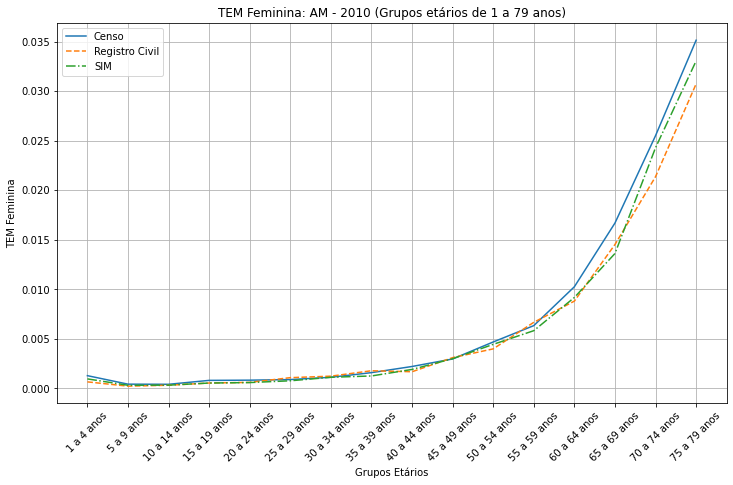

In [7]:
# Gráfico TEM Grupos etários > 1 ano e < 80
fig, ax = plt.subplots(figsize=(12,7))
ax.set(xlabel='Grupos Etários', ylabel='TEM Feminina',
       title='TEM Feminina: AM - 2010 (Grupos etários de 1 a 79 anos)');

# Faixa pra recorte do gráfico
i = 1
j = -5

x = dfPop["Idade"][i:j]

plt.plot(x, dfObitosCenso["TEM_f"][i:j], linestyle='solid', label="Censo")
plt.plot(x, dfObitosRegistroCivil["TEM_f"][i:j], linestyle='dashed', label="Registro Civil")
plt.plot(x, dfObitosSIM["TEM_f"][i:j], linestyle='dashdot', label="SIM")

plt.xticks(rotation=45)
plt.grid()

plt.legend();

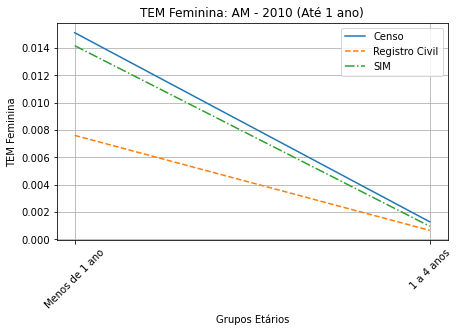

In [8]:
# Gráfico TEM < 1 ano
fig, ax = plt.subplots(figsize=(7,4))
ax.set(xlabel='Grupos Etários', ylabel='TEM Feminina',
       title='TEM Feminina: AM - 2010 (Até 1 ano)');

# Faixa pra recorte do gráfico
i = 0
j = 2

x = dfPop["Idade"][i:j]

plt.plot(x, dfObitosCenso["TEM_f"][i:j], linestyle='solid', label="Censo")
plt.plot(x, dfObitosRegistroCivil["TEM_f"][i:j], linestyle='dashed', label="Registro Civil")
plt.plot(x, dfObitosSIM["TEM_f"][i:j], linestyle='dashdot', label="SIM")

plt.xticks(rotation=45)
plt.grid()

plt.legend();

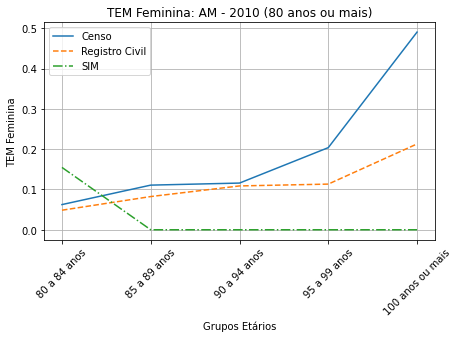

In [9]:
# Gráfico TEM: 80+
fig, ax = plt.subplots(figsize=(7,4))
ax.set(xlabel='Grupos Etários', ylabel='TEM Feminina',
       title='TEM Feminina: AM - 2010 (80 anos ou mais)');

i = -5
#j = 

x = dfPop["Idade"][i:]

plt.plot(x, dfObitosCenso["TEM_f"][i:], linestyle='solid', label="Censo")
plt.plot(x, dfObitosRegistroCivil["TEM_f"][i:], linestyle='dashed', label="Registro Civil")
plt.plot(x, dfObitosSIM["TEM_f"][i:], linestyle='dashdot', label="SIM")

plt.xticks(rotation=45)
plt.grid()

plt.legend();

# Gráficos TEM Homens TODO

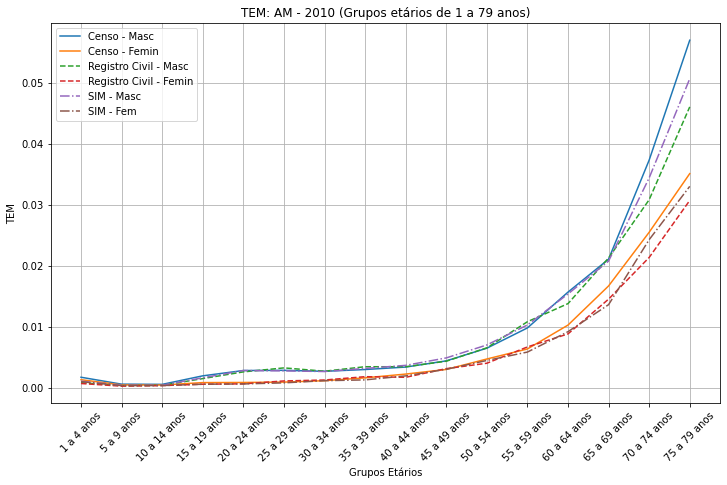

In [10]:
# Gráfico TEM Grupos etários > 1 ano e < 80
fig, ax = plt.subplots(figsize=(12,7))
ax.set(xlabel='Grupos Etários', ylabel='TEM',
       title='TEM: AM - 2010 (Grupos etários de 1 a 79 anos)');

# Faixa pra recorte do gráfico
i = 1
j = -5

x = dfPop["Idade"][i:j]

plt.plot(x, dfObitosCenso["TEM_m"][i:j], linestyle='solid', label="Censo - Masc")
plt.plot(x, dfObitosCenso["TEM_f"][i:j], linestyle='solid', label="Censo - Femin")

plt.plot(x, dfObitosRegistroCivil["TEM_m"][i:j], linestyle='dashed', label="Registro Civil - Masc")
plt.plot(x, dfObitosRegistroCivil["TEM_f"][i:j], linestyle='dashed', label="Registro Civil - Femin")

plt.plot(x, dfObitosSIM["TEM_m"][i:j], linestyle='dashdot', label="SIM - Masc")
plt.plot(x, dfObitosSIM["TEM_f"][i:j], linestyle='dashdot', label="SIM - Fem")

plt.xticks(rotation=45)
plt.grid()

plt.legend();

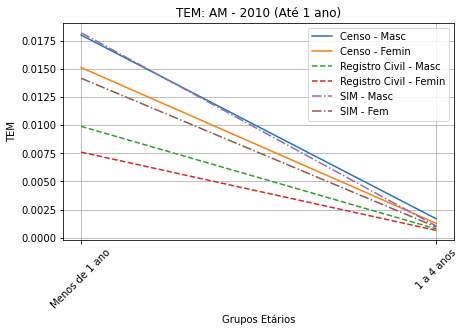

In [11]:
# Gráfico TEM < 1 ano
fig, ax = plt.subplots(figsize=(7,4))
ax.set(xlabel='Grupos Etários', ylabel='TEM',
       title='TEM: AM - 2010 (Até 1 ano)');

# Faixa pra recorte do gráfico
i = 0
j = 2

x = dfPop["Idade"][i:j]

plt.plot(x, dfObitosCenso["TEM_m"][i:j], linestyle='solid', label="Censo - Masc")
plt.plot(x, dfObitosCenso["TEM_f"][i:j], linestyle='solid', label="Censo - Femin")

plt.plot(x, dfObitosRegistroCivil["TEM_m"][i:j], linestyle='dashed', label="Registro Civil - Masc")
plt.plot(x, dfObitosRegistroCivil["TEM_f"][i:j], linestyle='dashed', label="Registro Civil - Femin")

plt.plot(x, dfObitosSIM["TEM_m"][i:j], linestyle='dashdot', label="SIM - Masc")
plt.plot(x, dfObitosSIM["TEM_f"][i:j], linestyle='dashdot', label="SIM - Fem")

plt.xticks(rotation=45)
plt.grid()

plt.legend();

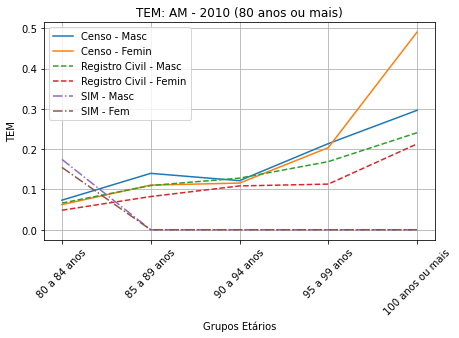

In [12]:
# Gráfico TEM: 80+
fig, ax = plt.subplots(figsize=(7,4))
ax.set(xlabel='Grupos Etários', ylabel='TEM',
       title='TEM: AM - 2010 (80 anos ou mais)');

i = -5
#j = 

x = dfPop["Idade"][i:]

plt.plot(x, dfObitosCenso["TEM_m"][i:], linestyle='solid', label="Censo - Masc")
plt.plot(x, dfObitosCenso["TEM_f"][i:], linestyle='solid', label="Censo - Femin")

plt.plot(x, dfObitosRegistroCivil["TEM_m"][i:], linestyle='dashed', label="Registro Civil - Masc")
plt.plot(x, dfObitosRegistroCivil["TEM_f"][i:], linestyle='dashed', label="Registro Civil - Femin")

plt.plot(x, dfObitosSIM["TEM_m"][i:], linestyle='dashdot', label="SIM - Masc")
plt.plot(x, dfObitosSIM["TEM_f"][i:], linestyle='dashdot', label="SIM - Fem")

plt.xticks(rotation=45)
plt.grid()

plt.legend();

# Gerando Tábua de Vida em biblioteca "demogR" a partir de dados do Censo

In [13]:
%load_ext rpy2.ipython

/opt/anaconda3/envs/DM017/lib/python3.7/site-packages/rpy2/robjects/pandas2ri.py:17: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import Index as PandasIndex


In [14]:
%%R
library(demogR)
dfObitosSIM = read.csv('dados/Tabua-2010-AM-SIM.csv', sep=';', header=T)
dfObitosSIM

            Idade Obitos_m Obitos_f        TEM_m        TEM_f  Pop_f  Pop_m
1  Menos de 1 ano    661.6    518.4 0.0181918170 0.0141569720  36618  36368
2      1 a 4 anos    158.4    140.1 0.0010434920 0.0009557790 146582 151798
3      5 a 9 anos     73.2     59.0 0.0003734789 0.0003133514 188287 195995
4    10 a 14 anos     77.2     64.0 0.0003795141 0.0003244136 197279 203418
5    15 a 19 anos    291.7     98.1 0.0015979534 0.0005383750 182215 182546
6    20 a 24 anos    475.2     99.1 0.0027913206 0.0005857043 169198 170242
7    25 a 29 anos    440.1    124.1 0.0027289131 0.0007648549 162253 161273
8    30 a 34 anos    374.9    160.1 0.0026270058 0.0011192830 143038 142710
9    35 a 39 anos    365.9    145.1 0.0031328664 0.0012512828 115961 116794
10   40 a 44 anos    356.9    179.1 0.0036396826 0.0019108688  93727  98058
11   45 a 49 anos    390.0    231.1 0.0048622972 0.0029939887  77188  80209
12   50 a 54 anos    448.1    272.2 0.0069887861 0.0044408190  61295  64117
13   55 a 59

## Tábua de Vida AM-2010 - Homens

In [15]:
%%R
dfObitosSIM.ltm = with(dfObitosSIM, life.table(x=Idade, nDx=Obitos_m, nKx=Pop_m, type="kf"))
write.csv(dfObitosSIM.ltm,"dados/Tabua-Homens-2010-AM.csv", sep=';', row.names = FALSE)
dfObitosSIM.ltm

                x    nax    nMx    nqx     lx    ndx    nLx    Tx    ex
1  Menos de 1 ano 0.1009 0.0182 0.0179 1.0000 0.0179 0.9839 73.06 73.06
2      1 a 4 anos 1.5000 0.0010 0.0042 0.9821 0.0041 3.9182 72.08 73.39
3      5 a 9 anos 2.5000 0.0004 0.0019 0.9780 0.0018 4.8855 68.16 69.69
4    10 a 14 anos 2.5000 0.0004 0.0019 0.9762 0.0019 4.8763 63.27 64.82
5    15 a 19 anos 2.5000 0.0016 0.0080 0.9743 0.0078 4.8523 58.40 59.93
6    20 a 24 anos 2.5000 0.0028 0.0139 0.9666 0.0134 4.7994 53.54 55.39
7    25 a 29 anos 2.5000 0.0027 0.0136 0.9532 0.0129 4.7336 48.74 51.14
8    30 a 34 anos 2.5000 0.0026 0.0130 0.9403 0.0123 4.6707 44.01 46.81
9    35 a 39 anos 2.5000 0.0031 0.0155 0.9280 0.0144 4.6039 39.34 42.39
10   40 a 44 anos 2.5000 0.0036 0.0180 0.9136 0.0165 4.5267 34.74 38.02
11   45 a 49 anos 2.5000 0.0049 0.0240 0.8971 0.0215 4.4316 30.21 33.67
12   50 a 54 anos 2.5000 0.0070 0.0343 0.8756 0.0301 4.3026 25.78 29.44
13   55 a 59 anos 2.5000 0.0103 0.0501 0.8455 0.0423 4.1216 21.4

## Tábua de Vida AM-2010 - Mulheres

In [16]:
%%R
dfObitosSIM.ltf = with(dfObitosSIM, life.table(x=Idade, nDx=Obitos_f, nKx=Pop_f, type="kf"))
write.csv(dfObitosSIM.ltf,"dados/Tabua-Mulheres-2010-AM.csv", sep=';', row.names = FALSE)
dfObitosSIM.ltf

                x     nax    nMx    nqx     lx    ndx    nLx    Tx    ex
1  Menos de 1 ano  0.0941 0.0142 0.0140 1.0000 0.0140 0.9873 80.23 80.23
2      1 a 4 anos  1.5000 0.0010 0.0038 0.9860 0.0038 3.9347 79.25 80.37
3      5 a 9 anos  2.5000 0.0003 0.0016 0.9823 0.0015 4.9075 75.31 76.67
4    10 a 14 anos  2.5000 0.0003 0.0016 0.9807 0.0016 4.8996 70.40 71.79
5    15 a 19 anos  2.5000 0.0005 0.0027 0.9791 0.0026 4.8891 65.51 66.90
6    20 a 24 anos  2.5000 0.0006 0.0029 0.9765 0.0029 4.8754 60.62 62.07
7    25 a 29 anos  2.5000 0.0008 0.0038 0.9736 0.0037 4.8589 55.74 57.25
8    30 a 34 anos  2.5000 0.0011 0.0056 0.9699 0.0054 4.8361 50.88 52.46
9    35 a 39 anos  2.5000 0.0013 0.0062 0.9645 0.0060 4.8075 46.05 47.74
10   40 a 44 anos  2.5000 0.0019 0.0095 0.9585 0.0091 4.7697 41.24 43.02
11   45 a 49 anos  2.5000 0.0030 0.0149 0.9494 0.0141 4.7117 36.47 38.41
12   50 a 54 anos  2.5000 0.0044 0.0220 0.9353 0.0205 4.6251 31.76 33.95
13   55 a 59 anos  2.5000 0.0058 0.0287 0.9147 0.02